<a href="https://colab.research.google.com/github/flatplanet/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import csv
import plotly
#import plotly.graph_obcalled_listects as go
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import unittest
import os
import project_functions
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
#1 Model based on regressed values (no other data)- retrieving our dataframe used for ML inputs and training goal
ti_ppi_df = pd.read_csv("Relevant Data/ti_ppi_df.csv")
display(ti_ppi_df)
ti_ppi_df['net_change'] = ti_ppi_df['shifted_close'] - ti_ppi_df['close']
ti_ppi_df['percent_change'] = ti_ppi_df['net_change'] / ti_ppi_df['close']
display(ti_ppi_df)
#ti_ppi_df.to_csv('Relevant Data/ti_ppi_df.csv', index=False)


,new_index,time,close,shifted_close,linear_p_x,quad_p_x,cubic_p_x
0,0,1971-01-01,27.2,27.3,31.176075,17.518617,38.307471
1,1,1971-02-01,27.3,27.6,31.471688,17.938576,38.348878
2,2,1971-03-01,27.6,28.2,31.767300,18.358157,38.392783
3,3,1971-04-01,28.2,28.2,32.062912,18.777361,38.439178
4,4,1971-05-01,28.2,28.2,32.358524,19.196186,38.488054
...,...,...,...,...,...,...,...
655,655,2025-08-01,233.4,233.4,224.802082,211.639744,192.347876
656,656,2025-09-01,233.4,233.8,225.097694,211.812143,192.150326
657,657,2025-10-01,233.8,234.0,225.393306,211.984164,191.949538
658,658,2025-11-01,234.0,234.0,225.688919,212.155807,191.745505


,new_index,time,close,shifted_close,linear_p_x,quad_p_x,cubic_p_x,net_change,percent_change
0,0,1971-01-01,27.2,27.3,31.176075,17.518617,38.307471,0.1,0.003676
1,1,1971-02-01,27.3,27.6,31.471688,17.938576,38.348878,0.3,0.010989
2,2,1971-03-01,27.6,28.2,31.767300,18.358157,38.392783,0.6,0.021739
3,3,1971-04-01,28.2,28.2,32.062912,18.777361,38.439178,0.0,0.000000
4,4,1971-05-01,28.2,28.2,32.358524,19.196186,38.488054,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
655,655,2025-08-01,233.4,233.4,224.802082,211.639744,192.347876,0.0,0.000000
656,656,2025-09-01,233.4,233.8,225.097694,211.812143,192.150326,0.4,0.001714
657,657,2025-10-01,233.8,234.0,225.393306,211.984164,191.949538,0.2,0.000855
658,658,2025-11-01,234.0,234.0,225.688919,212.155807,191.745505,0.0,0.000000


In [4]:
# Model_1 is based on derivatives, regressed predictions, of the base time series
class Model_1(nn.Module):
  # Input layer (new index, 3 regressed values, to predict percentage change) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (I want one numeric prediction)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=1):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [6]:
# Pick a manual seed for randomization
torch.manual_seed(37)
# Create an instance of model
model = Model_1()
my_df = ti_ppi_df
# Remove the last row as it doesn't have the associated prediction. 
my_df = my_df.iloc[:-1]
my_df.tail()

In [10]:
# Train Test Split!  Set X, y
X = my_df.drop('time', axis=1)
X = my_df.drop('time', axis=1)
y = my_df['percent_change']

In [11]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [88]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [89]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [90]:
y_train = list(y_train.astype(float))
y_test = list(y_test.astype(float))


In [91]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [92]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [93]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347078323364
Epoch: 30 and loss: 0.5859931707382202
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794713735580444
Epoch: 60 and loss: 0.1796349436044693
Epoch: 70 and loss: 0.12165625393390656
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522615998983383


Text(0.5, 0, 'Epoch')

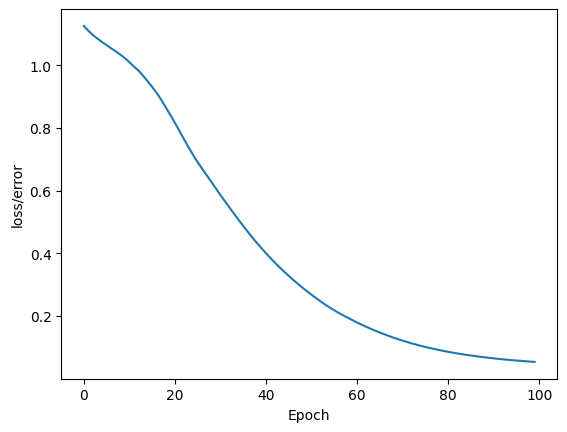

In [94]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [95]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [96]:
loss

tensor(0.1315)

In [97]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.)  tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.)  tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.)  tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.)  tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.)  tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.)  tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.)  tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.)  tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.)  tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.)  tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.)  tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.)  tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.)  tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.)  tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.)  tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.)  tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.)  tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.)  tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.)  tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.)  ten

In [98]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [99]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [100]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [101]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


In [102]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [103]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [104]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)